In [1]:
#!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\propietario\.cache\kagglehub\datasets\salvatorerastelli\spotify-and-youtube\versions\2


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
	
from sklearn.model_selection import train_test_split

In [5]:
spotify_youtube_completo_df = pd.read_csv(os.path.join(path, "Spotify_Youtube.csv"))

Eliminamos todas las filas donde el target (Stream) es nulo, ya que no pueden utilizarse para entrenar ni evaluar el modelo, dado que es la métrica que queremos predecir, cualquier observación sin este valor carece de utilidad para el entrenamiento del modelo.

In [6]:
spotify_youtube_completo_df = spotify_youtube_completo_df.dropna(subset=["Stream"])

Dividimos nuestro dataset en train y test. Hemos decidido que el test sea el 20% de los datos. Además, fijamos el random_state para que nuestros datos sean reproducibles.

In [7]:
train_df, test_df = train_test_split(
    spotify_youtube_completo_df,
    test_size=0.2,
    random_state=42
)

In [8]:
spotify_youtube_df = train_df 

## Vamos a echar un primer vistazo a los datos:

In [9]:
spotify_youtube_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
17164,17164,KAYTRANADA,https://open.spotify.com/artist/6qgnBH6iDM91ip...,LITE SPOTS,99.9%,album,spotify:track:3Fc7k96EGOGiJBMZUxbpq7,0.884,0.549,1.0,...,https://www.youtube.com/watch?v=KZnou4zthz4,KAYTRANADA - LITE SPOTS,KAYTRANADA,6570209.0,86761.0,2419.0,"Taken from KAYTRANADA’s debut album 99.9%, out...",True,True,29240851.0
14868,14868,Rita Ora,https://open.spotify.com/artist/5CCwRZC6euC8Od...,Follow Me,Follow Me,single,spotify:track:2Xy1UIVfOlukyye6Fd0wrI,0.673,0.729,6.0,...,https://www.youtube.com/watch?v=G8XGYpdkYoA,"Sam Feldt, Rita Ora - Follow Me (Official Video)",SamFeldtVEVO,3966591.0,54290.0,752.0,"Hey guys, hope you enjoy the official video fo...",True,True,82813284.0
13084,13084,Big Sean,https://open.spotify.com/artist/0c173mlxpT3dSF...,Bounce Back,I Decided.,album,spotify:track:0SGkqnVQo9KPytSri1H6cF,0.780,0.575,1.0,...,https://www.youtube.com/watch?v=phr1pOFK1V8,Big Sean - Bounce Back (Official Music Video),BigSeanVEVO,187756219.0,1446074.0,33404.0,I DECIDED. Available Now http://smarturl.it/ID...,True,True,666145000.0
6558,6558,Dave Matthews Band,https://open.spotify.com/artist/2TI7qyDE0QfyOl...,#41,Crash,album,spotify:track:2nklcPJ3YhYJfC2ibStXz9,0.577,0.726,4.0,...,https://www.youtube.com/watch?v=NTC__g12xPs,Dave Matthews Band - Two Step (from The Centra...,davematthewsbandVEVO,4160936.0,20527.0,1248.0,Dave Matthews Band performing “Two Step” live ...,True,True,34528391.0
16283,16283,Ray Dalton,https://open.spotify.com/artist/4e0nWw2r4BoQSK...,Call It Love - Klingande Remix,Call It Love (Klingande Remix),single,spotify:track:4qqaez1f2mrR4pixnmoNiY,0.671,0.687,10.0,...,https://www.youtube.com/watch?v=xwYA1d0E_RM,Felix Jaehn & Ray Dalton - Call It Love (Offic...,FelixJaehnVEVO,6035929.0,57024.0,686.0,Felix Jaehn & Ray Dalton - 'Call It Love' out ...,True,True,1153344.0


In [10]:
spotify_youtube_df.shape

(16113, 28)

In [11]:
spotify_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16113 entries, 17164 to 16290
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16113 non-null  int64  
 1   Artist            16113 non-null  object 
 2   Url_spotify       16113 non-null  object 
 3   Track             16113 non-null  object 
 4   Album             16113 non-null  object 
 5   Album_type        16113 non-null  object 
 6   Uri               16113 non-null  object 
 7   Danceability      16112 non-null  float64
 8   Energy            16112 non-null  float64
 9   Key               16112 non-null  float64
 10  Loudness          16112 non-null  float64
 11  Speechiness       16112 non-null  float64
 12  Acousticness      16112 non-null  float64
 13  Instrumentalness  16112 non-null  float64
 14  Liveness          16112 non-null  float64
 15  Valence           16112 non-null  float64
 16  Tempo             16112 non-null  float64

In [12]:
spotify_youtube_df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,16113.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,16112.000000,1.611200e+04,1.574200e+04,1.568900e+04,1.566100e+04,1.611300e+04
mean,10391.202135,0.620333,0.636807,5.300645,-7.621132,0.094789,0.290963,0.054456,0.192869,0.530461,120.502435,2.239890e+05,9.501777e+07,6.685927e+05,2.823761e+04,1.344775e+08
std,5988.683331,0.165435,0.213540,3.573654,4.630012,0.106361,0.286569,0.191128,0.166913,0.245253,29.541866,1.222831e+05,2.745357e+08,1.795563e+06,2.105813e+05,2.420817e+08
min,1.000000,0.000000,0.000020,0.000000,-44.761000,0.000000,0.000001,0.000000,0.015000,0.000000,0.000000,3.098500e+04,4.100000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,5191.000000,0.520000,0.510000,2.000000,-8.761250,0.035700,0.045000,0.000000,0.094400,0.340750,96.981000,1.797460e+05,1.860354e+06,2.215500e+04,5.260000e+02,1.763418e+07
50%,10449.000000,0.638000,0.667000,5.000000,-6.498000,0.050400,0.191000,0.000002,0.126000,0.539000,119.959000,2.127440e+05,1.499018e+07,1.282970e+05,3.335000e+03,4.971015e+07
75%,15567.000000,0.741000,0.799000,8.000000,-4.915000,0.103000,0.477000,0.000420,0.236000,0.726000,139.922500,2.518032e+05,7.179263e+07,5.308270e+05,1.449100e+04,1.375698e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.962000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.362005e+09


In [13]:
spotify_youtube_df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Instrumentalness      1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Url_youtube         371
Title               371
Channel             371
Views               371
Likes               424
Comments            452
Description         691
Licensed            371
official_video      371
Stream                0
dtype: int64

Tras revisar el dataset, las siguientes columnas no aportan información útil para el EDA ni para el modelado y pueden eliminarse:  

⁠Unnamed: 0 → índice exportado por error  
⁠Url_spotify → enlace, no aporta información analítica  
⁠Url_youtube → enlace, no aporta información analítica  
⁠Uri → identificador interno sin valor analítico  
⁠Description → texto libre, muy incompleto y no cuantitativo  
Title → Identificador de la canción de youtube, ya tenemos esos datos recogidos antes con la columna track  
Channel → canal de youtube del vídeo, no aporta información analítica

In [14]:
spotify_youtube_df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Instrumentalness      1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Url_youtube         371
Title               371
Channel             371
Views               371
Likes               424
Comments            452
Description         691
Licensed            371
official_video      371
Stream                0
dtype: int64

In [15]:
spotify_youtube_df= spotify_youtube_df.drop(['Unnamed: 0', 'Url_spotify', 'Url_youtube', 'Uri', 'Description','Title', 'Channel'],axis=1)

In [16]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

## Vamos a estudiar las columnas, los datos que nos aportan y si hay valores erróneos:


### Artist, Track y Album 
Columnas que identifican de manera única cada dato. Además, como podemos ver anteriormente,  no tienen valores nulos luego no necesitamos modificarlas ni eliminarlas

### Album_type
La columna nos indica cómo se ha sacado la canción (como single, album o recopilación), de esta forma, podemos obtener informacion útil sobre la mejor manera de sacar una canción para que triunfe

In [17]:
spotify_youtube_df['Album_type'].unique()


array(['album', 'single', 'compilation'], dtype=object)

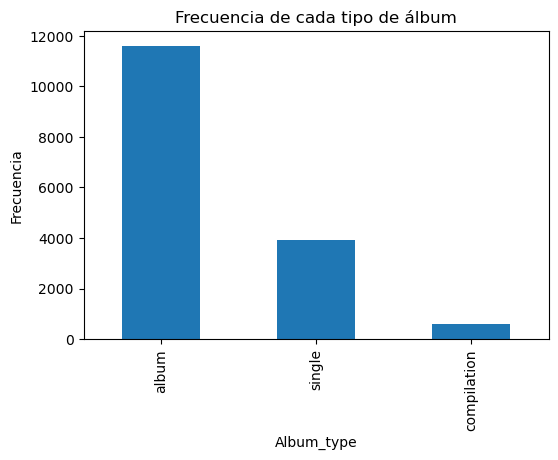

In [18]:
spotify_youtube_df["Album_type"].value_counts().plot(
    kind="bar",
    figsize=(6,4))
plt.title("Frecuencia de cada tipo de álbum")
plt.xlabel("Album_type")
plt.ylabel("Frecuencia")
plt.show()

Visualizamos la variable Album_type en un grafico de barras para ver la distribución de las canciones, la mayoría pertenecen a álbumes (14926), mientras que los
singles (5004) son menos frecuentes y las compilaciones (788) aparecen en muy poca cantidad.



### Danceability 
Permite ver cómo de buena es una canción para bailarla, los datos se recogen entre 0 y 1

In [19]:
spotify_youtube_df['Danceability'].describe()


count    16112.000000
mean         0.620333
std          0.165435
min          0.000000
25%          0.520000
50%          0.638000
75%          0.741000
max          0.975000
Name: Danceability, dtype: float64

Corroboramos que no tenemos datos fuera del rango pues se ve el mínimo es 0 y el máximo 0.975

### Energy 
Mide la energia en el rango [0.0 ; 1.0] representa la intensidad y la actividad, en funcion de si ees más energetico, ruidoso o alta. 
Musica clasica tendrá valores mas cercanos a 0

In [20]:
spotify_youtube_df[
    (spotify_youtube_df["Energy"] < 0) |
    (spotify_youtube_df["Energy"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


No hay valores fuera de rango (también podíamos haber visto el .describe)

### Key
Esta columna recoge la tonalidad en la que está la pista. Sigue la notación Pitch Class.  
Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.  
Si no se detecta ninguna tonalidad, el valor es -1.

In [21]:
spotify_youtube_df['Key'].value_counts()

Key
0.0     1797
7.0     1758
1.0     1709
2.0     1556
9.0     1524
5.0     1347
11.0    1316
4.0     1176
8.0     1162
6.0     1142
10.0    1089
3.0      536
Name: count, dtype: int64

Vemos que no está el valor -1, luego no hay missing values.  
Como esta columna representa en realidad una tonalidad musical codificada mediante numeros enteros, convertimos su tipo de dato float a entero. 
Y con el objetivo de facilitar el análisis explotariorio y la interpretacion de los datos creamos una nueva variables categórica (Key_name) que traduce el valor numerico de la tonalidad a su correspondiente notación musical

In [22]:
diccionario_notas = {
    0: "C",
    1: "C# / Db",
    2: "D",
    3: "D# / Eb",
    4: "E",
    5: "F",
    6: "F# / Gb",
    7: "G",
    8: "G# / Ab",
    9: "A",
    10: "A# / Bb",
    11: "B"
}

In [23]:
spotify_youtube_df["Key_name"] = spotify_youtube_df["Key"].map(diccionario_notas)


In [24]:
spotify_youtube_df["Key"] = spotify_youtube_df["Key"].astype("Int64")

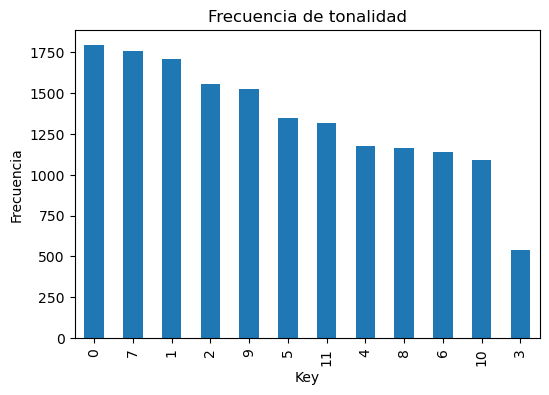

In [25]:
spotify_youtube_df["Key"].value_counts().plot(
    kind="bar",
    figsize=(6,4))
plt.title("Frecuencia de tonalidad")
plt.xlabel("Key")
plt.ylabel("Frecuencia")
plt.show()

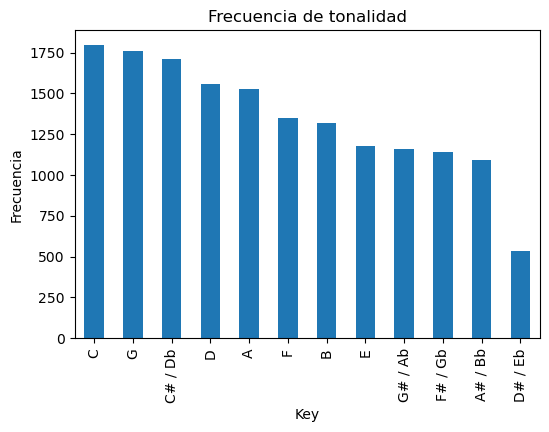

In [26]:
spotify_youtube_df["Key_name"].value_counts().plot(
    kind="bar",
    figsize=(6,4))
plt.title("Frecuencia de tonalidad")
plt.xlabel("Key")
plt.ylabel("Frecuencia")
plt.show()

Generamos un grafico para visualizar que se ha cambiado correctamente por su tono musical en la nueva columna y tambien obtener una visión clara de las tonalidades más utilizadas en las canciones del dataset como el tono C (2305) y tono G (2252)

### Loudness
Representa la sonoridad global de una canción medida en decibelios (dB). Este valor se calcula como una media a lo largo de toda la pista y permite comparar la intensidad sonora entre diferentes canciones.  
Los valores de Loudness suelen estar comprendidos entre –60 dB y 0 dB:  
⁠Canciones con valores alrededor de –60 dB son muy suaves o acústicas.  
⁠Canciones con valores cercanos a 0 dB son muy intensas, comprimidas y típicas de géneros más comerciales o electrónicos.

In [27]:
spotify_youtube_df["Loudness"].describe()

count    16112.000000
mean        -7.621132
std          4.630012
min        -44.761000
25%         -8.761250
50%         -6.498000
75%         -4.915000
max          0.920000
Name: Loudness, dtype: float64

In [28]:
spotify_youtube_df[
    (spotify_youtube_df["Loudness"] < -60) |
    (spotify_youtube_df["Loudness"]  > 0)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
10578,"Sergio Vega ""El Shaka""",Me Gusta Estar Contigo,Me Gusta Estar Contigo,album,0.888,0.741,5,0.522,0.0573,0.4950,...,0.968,105.789,138467.0,4976974.0,6740.0,191.0,False,False,25302700.0,F
11826,Cascada,Everytime We Touch - Fallen Superhero Remix,Everytime We Touch (Fallen Superhero Remix),single,0.610,0.971,6,0.006,0.1690,0.0641,...,0.487,150.089,218587.0,6967544.0,59878.0,636.0,False,False,12159973.0,F# / Gb
15187,Shilpi Raj,Le Le Aayi Coca Cola,Le Le Aayi Coca Cola,single,0.716,0.962,5,0.561,0.1010,0.3570,...,0.857,114.993,277569.0,327570837.0,2109990.0,107962.0,True,True,3667356.0,F
9423,Sub Focus,Siren,Solar System / Siren,single,0.486,0.986,5,0.920,0.0620,0.1180,...,0.241,173.983,256000.0,1042170.0,16584.0,329.0,True,True,14126273.0,F


Estas cuatro filas deben eliminarse porque los valores de Loudness están fuera del rango válido para una canción (–60 dB a 0 dB), por
tanto, representan datos erróneos y eliminarlos mejora la calidad del análisis.

In [29]:
spotify_youtube_df = spotify_youtube_df[(spotify_youtube_df['Loudness'] >= -60) & (spotify_youtube_df['Loudness'] <= 0)]


### Speechiness
Esta columna nos indica la presencia de palabras en una canción, los valores cercanos a 1 son las pistas completamente habladas, como por ejemplo un audio libro.
los valores en el rango [0.33 ; 0.66] combinan música y voz, por otro lado los valores por debajo de 0.33, su contenido sera principalmente musical.
Esto es especialmente útil si queremos filtrar o segmentar canciones según su estilo o presencia de voz hablada, no modificamos el contenido

In [30]:
spotify_youtube_df[
    (spotify_youtube_df["Speechiness"] < 0) |
    (spotify_youtube_df["Speechiness"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name


In [31]:
spotify_youtube_df['Speechiness'].describe()

count    16108.000000
mean         0.094788
std          0.106371
min          0.000000
25%          0.035700
50%          0.050400
75%          0.103000
max          0.962000
Name: Speechiness, dtype: float64

In [32]:
spotify_youtube_df[spotify_youtube_df['Speechiness'] == spotify_youtube_df['Speechiness'].min()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
9358,Ocean Waves For Sleep,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,...,0.0,0.0,93452.0,328.0,1.0,0.0,True,True,54256600.0,A
7187,Luciano Pavarotti,"Rigoletto / Act 3: ""La donna è mobile"" - Live",The Three Tenors - The Best of the 3 Tenors,compilation,0.0,0.402000,5,-15.718,0.0,0.97200,...,0.0,0.0,151253.0,31017254.0,204651.0,9002.0,False,False,1995393.0,F
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0,0.405000,0,-9.935,0.0,0.84200,...,0.0,0.0,147000.0,12691825.0,98026.0,4050.0,False,False,22358910.0,C
2871,The Alchemist,Arrival,Israeli Salad,album,0.0,0.802000,1,-7.977,0.0,0.00417,...,0.0,0.0,94967.0,104635.0,1905.0,21.0,True,True,9283211.0,C# / Db
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0,0.036200,0,-22.519,0.0,0.99400,...,0.0,0.0,151507.0,185634.0,1796.0,20.0,True,True,11902123.0,C
9348,Ocean Sounds,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,9,-17.746,0.0,0.00948,...,0.0,0.0,93452.0,328.0,1.0,0.0,True,True,54256600.0,A
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,8,-28.460,0.0,0.79100,...,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,956435715.0,G# / Ab
13848,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,single,0.0,0.003420,8,-28.460,0.0,0.79100,...,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,26018007.0,G# / Ab
8373,M83,Adieux,You And The Night,album,0.0,0.105000,7,-13.925,0.0,0.98900,...,0.0,0.0,64840.0,50330.0,453.0,11.0,True,True,3387203.0,G
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,10,-21.995,0.0,0.92100,...,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0,A# / Bb


Vemos que el valor máximo de Speechiness corresponden a grabaciones de ruido blanco o sonidos relajantes para dormir bebés, ya que son contenido sonoro predominantemente no musical.

In [33]:
spotify_youtube_df[spotify_youtube_df['Speechiness'] == spotify_youtube_df['Speechiness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
5152,Sir Arthur Conan Doyle,Teil 1 - Sherlock Holmes und die Geheimwaffe -...,Sherlock Holmes und die Geheimwaffe [Sherlock ...,album,0.641,0.286,3,-14.945,0.962,0.177,...,0.487,85.538,92378.0,25108.0,418.0,9.0,True,True,12567.0,D# / Eb


### Acousticness 
Esta columna mide la probabilidad de que una pista sea acustica medida en el rango entre [0.0 ; 1.0], 
1.0 la pista será con un 100% de probabilidad acústica y 0.0 no habrá probabilidad de que sea acústica


In [34]:
spotify_youtube_df['Acousticness'].describe()

count    16108.000000
mean         0.290971
std          0.286591
min          0.000001
25%          0.045000
50%          0.191000
75%          0.477000
max          0.996000
Name: Acousticness, dtype: float64

In [35]:
spotify_youtube_df[spotify_youtube_df['Acousticness'] == spotify_youtube_df['Acousticness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
7219,John Powell,P.S. I Love You,P.S. I Love You,album,0.462,0.02940,0,-28.156,0.0481,0.996,...,0.3880,79.459,83293.0,38040.0,338.0,4.0,True,True,13181774.0,C
9027,Aphex Twin,Avril 14th,Drukqs,album,0.558,0.02590,8,-30.016,0.0458,0.996,...,0.3700,157.811,125520.0,3831690.0,25186.0,4180.0,False,False,149358376.0,G# / Ab
5360,Robert Schumann,"Schumann: Kinderszenen, Op. 15: No. 1, Von fre...","Schumann : Kinderszenen, Waldszenen & Bunte Bl...",album,0.279,0.00647,7,-38.339,0.0577,0.996,...,0.2370,67.454,100267.0,223774.0,1685.0,44.0,False,False,2110799.0,G
4056,Erik Satie,Gnossienne No. 1,Gnossienne No. 1,single,0.376,0.00579,5,-31.615,0.0576,0.996,...,0.0369,71.827,296480.0,10545759.0,173981.0,9535.0,False,False,43255565.0,F
4290,Johannes Brahms,"16 Waltzes, Op. 39 (1867 version): No. 15 in A...",Brahms: Waltzes / Cadenzas / Die Schone Magelone,album,0.406,0.00620,9,-39.131,0.0573,0.996,...,0.2160,79.377,85240.0,222713.0,3199.0,149.0,True,True,969788.0,A
5354,Robert Schumann,"Kinderszenen, Op. 15: No. 1, Von fremden Lände...",Schumann: Kinderszenen; Arabesque; Fantasie; T...,album,0.374,0.00526,7,-35.546,0.0533,0.996,...,0.3860,69.813,93387.0,223774.0,1685.0,44.0,False,False,12789222.0,G
2757,Pyotr Ilyich Tchaikovsky,"Album for the Young, Op. 39: No. 3. Mamma (Maman)","Piano Recital: Rosenberger, Carol - Kabalevsky...",album,0.418,0.00869,7,-37.257,0.0455,0.996,...,0.4200,87.273,93507.0,5292.0,19.0,0.0,True,True,20909481.0,G
4060,Erik Satie,3 Gymnopédies: No. 1 Lent et douloureux,Satie: The Magic of Satie,album,0.590,0.00399,7,-36.497,0.2420,0.996,...,0.1820,74.381,219760.0,40003899.0,691633.0,39823.0,False,False,12716957.0,G
6297,Edvard Grieg,"Lyric Pieces Book I, Op. 12: No. 1 Arietta",Grieg: Lyric Pieces,album,0.445,0.00325,3,-41.001,0.0581,0.996,...,0.3730,129.794,87000.0,479077.0,3463.0,128.0,False,False,2176763.0,D# / Eb
5358,Robert Schumann,"Kinderszenen, Op. 15: 7. Träumerei",Schumann: Kreisleriana; Kinderszenen; Fantasie...,album,0.404,0.01510,5,-35.799,0.0652,0.996,...,0.2820,134.935,150600.0,415188.0,5252.0,102.0,False,False,8683089.0,F


Comprobamos que todos los valores se encuentran dentro del rango válido, por lo que no hay registros que eliminar. Además revisamos las pistas con valores más altos de Acousticness, confirmando que corresponden a canciones predominantemente acústicas. 

### Instrumentalness
Es la columna encagada de indicar si una pista no contiene voces, detecta sonidos como 'oooh' como instrumentales, en este caso, canciones de rap se considerarán totalmente vocales y los valores cercanos a 1.0 indicaran una alta probabilidad de que la pista no tenga contenido vocal.

In [36]:
spotify_youtube_df['Instrumentalness'].describe()


count    16108.000000
mean         0.054427
std          0.191086
min          0.000000
25%          0.000000
50%          0.000002
75%          0.000420
max          1.000000
Name: Instrumentalness, dtype: float64

In [37]:
spotify_youtube_df[spotify_youtube_df['Instrumentalness'] == spotify_youtube_df['Instrumentalness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,8,-28.460,0.0,0.791,...,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,956435715.0,G# / Ab
13848,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,single,0.0,0.003420,8,-28.460,0.0,0.791,...,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,26018007.0,G# / Ab
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,10,-21.995,0.0,0.921,...,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0,A# / Bb
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,1,-27.592,0.0,0.908,...,0.0,0.0,72223.0,2329675.0,11249.0,597.0,True,True,128701242.0,C# / Db


In [38]:
spotify_youtube_df[spotify_youtube_df['Instrumentalness']>0.1]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name
4613,Antônio Carlos Jobim,Só Tinha De Ser Com Você,Elis & Tom,album,0.7930,0.3720,10,-15.491,0.0509,0.6870,...,0.4820,120.134,233544.0,143819.0,1858.0,41.0,False,False,55027941.0,A# / Bb
7831,The Lyndhurst Orchestra,Earth,Gladiator: 20th Anniversary Edition,album,0.0876,0.0504,4,-29.690,0.0387,0.7550,...,0.0912,170.050,181867.0,10181.0,208.0,2.0,False,False,24422351.0,E
17737,Men I Trust,Numb,Numb,single,0.7830,0.3030,4,-14.393,0.0527,0.8110,...,0.6500,138.816,219340.0,11702391.0,630534.0,7043.0,True,True,46508509.0,E
13987,accelerate,Past Lives (sped up),Past Lives (sped up),single,0.7240,0.2200,6,-13.385,0.0325,0.9130,...,0.3180,138.037,113086.0,211814.0,5061.0,68.0,False,False,499987.0,F# / Gb
9414,I Monster,Sunny Delights,Neveroddoreven,album,0.5970,0.8110,9,-8.012,0.0286,0.0465,...,0.3270,95.997,290160.0,422262.0,3747.0,85.0,True,True,857086.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,Talking Heads,Once in a Lifetime,Remain in Light,album,0.6460,0.8800,2,-7.753,0.0637,0.0623,...,0.8020,116.916,259600.0,59030969.0,553186.0,33998.0,True,True,11010095.0,D
6655,Alexandre Desplat,Statues,"Harry Potter and the Deathly Hallows, Pt. 2 (O...",album,0.3210,0.2410,1,-20.495,0.0373,0.4420,...,0.0795,128.980,144200.0,451489.0,8656.0,56.0,True,True,29882589.0,C# / Db
5504,John Coltrane,My Little Brown Book,Duke Ellington & John Coltrane,album,0.3720,0.1870,0,-13.497,0.0323,0.9420,...,0.2170,70.334,319733.0,451073.0,5213.0,172.0,False,False,67415920.0,C
4592,Sir Simon Rattle,"Tchaikovsky: The Nutcracker, Op. 71, Act II: N...",Tchaikovsky: The Nutcracker,album,0.1490,0.1280,2,-20.459,0.0462,0.9440,...,0.1130,47.362,415813.0,280316.0,6070.0,19.0,True,True,37112679.0,D


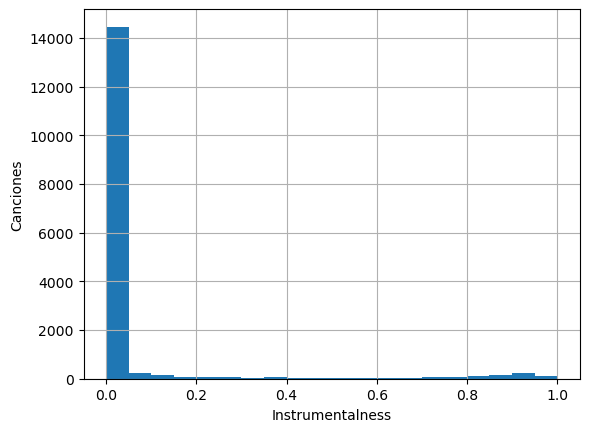

In [39]:
import matplotlib.pyplot as plt

spotify_youtube_df['Instrumentalness'].hist(bins=20)
plt.xlabel('Instrumentalness')
plt.ylabel('Canciones')
plt.show()

Decidimos eliminar la columna dado que la gran mayoria de los valores estan concentrados en 0, prácticamente todas las canciones contienen voces. Esto nos indica que la columna no aporta informacion relevante ni podemos obtener conclusiones significas

In [40]:
spotify_youtube_df = spotify_youtube_df.drop('Instrumentalness', axis=1)


### Liveness 
Esta columna mide de 0 a 1 la presencia de público en el momento de la grabación de la canción.  
Si se acerca a 1 implica que es una canción grabada en directo.

In [41]:
spotify_youtube_df['Liveness'].describe()

count    16108.000000
mean         0.192868
std          0.166926
min          0.015000
25%          0.094400
50%          0.126000
75%          0.236000
max          1.000000
Name: Liveness, dtype: float64

Como vemos, los valores que toma tienen sentido y están dentro de rango.

### Valance 
Mide cuanto de positiva o negativa es emocionalmente una canción. Su valor va de
0.0 a 1.0, donde:

⁠0.0 → canciones tristes, tensas o melancólicas  
1.0 → canciones alegres, optimistas o eufóricas  

Por tanto, cualquier valor menor que 0 o mayor que 1 se considera erróneo.

In [42]:
spotify_youtube_df["Valence"].describe()

count    16108.000000
mean         0.530434
std          0.245235
min          0.000000
25%          0.340750
50%          0.539000
75%          0.726000
max          0.993000
Name: Valence, dtype: float64

In [43]:
spotify_youtube_df[
    (spotify_youtube_df["Valence"] < 0) |
    (spotify_youtube_df["Valence"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Key_name



### Tempo 
Recogemos los BPM de la canción, es decir, la velocidad a la que va la canción

In [44]:
spotify_youtube_df['Tempo'].describe()

count    16108.000000
mean       120.498533
std         29.541349
min          0.000000
25%         96.981000
50%        119.959000
75%        139.921250
max        243.372000
Name: Tempo, dtype: float64

Vemos que no hay valores negativos lo que implica que los datos son correctos. Además, el máximo que es 243.37 nos parece un tempo razonable, luego no hay outliers.  
Hemos decidido añadir una columna para entender mejor los datos. Ejemplo: Si Tempo es 29.57 en la nueva columna Tempo_category se recoge como Grave, que en términos musicales implica que va bastante lento.

In [45]:
def classify_tempo(bpm):
    if bpm < 24:
        return 'Larghissimo'
    elif bpm < 46:
        return 'Grave'
    elif bpm < 61:
        return 'Lento / Largo'
    elif bpm < 77:
        return 'Adagio'
    elif bpm < 109:
        return 'Andante'
    elif bpm < 121:
        return 'Moderato / Allegretto'
    elif bpm < 157:
        return 'Allegro'
    elif bpm < 177:
        return 'Vivace'
    elif bpm < 201:
        return 'Presto'
    else:
        return 'Prestissimo'

In [46]:
spotify_youtube_df['Tempo_category'] = spotify_youtube_df['Tempo'].apply(classify_tempo)
spotify_youtube_df['Tempo_category']

17164    Moderato / Allegretto
14868                  Allegro
13084                  Andante
6558                   Andante
16283                  Allegro
                 ...          
11682                  Andante
12392    Moderato / Allegretto
5583                   Allegro
893                    Andante
16290                  Allegro
Name: Tempo_category, Length: 16108, dtype: object

Vamos a ordenar la nueva columna creada para ponerla al lado de la de 'Tempo', para una mejora en la lectura de los datos, al igual que 'Key' y 'Key_name'

In [47]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Licensed',
       'official_video', 'Stream', 'Key_name', 'Tempo_category'],
      dtype='object')

In [48]:
spotify_youtube_df = spotify_youtube_df[['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key','Key_name', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Licensed',
       'official_video', 'Stream']]

In [49]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Key_name', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Valence', 'Tempo', 'Tempo_category', 'Duration_ms',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

Vamos a analizar de manera análoga las variables: 
### ⁠Views
Número total de visualizaciones del vídeo en YouTube.  
### ⁠Likes 
Número de "me gusta" que ha recibido el vídeo en YouTube.  
### ⁠Comments
Número de comentarios publicados en el vídeo de YouTube.    
### ⁠Duration_ms
Duración total de la canción en milisegundos.

Todas estas variables son cuantitativas, de tipo numérico y deben tomar valores
mayores o iguales a 0, ya que no es posible tener visualizaciones, likes o streams
negativos. Valores negativos o extremadamente atípicos se considerarían erróneos.

In [50]:
spotify_youtube_df["Views"].describe()

count    1.573700e+04
mean     9.502495e+07
std      2.745696e+08
min      4.100000e+01
25%      1.860182e+06
50%      1.499120e+07
75%      7.180963e+07
max      8.079649e+09
Name: Views, dtype: float64

In [51]:
spotify_youtube_df[spotify_youtube_df["Views"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [52]:
spotify_youtube_df["Likes"].describe()

count    1.568400e+04
mean     6.686554e+05
std      1.795786e+06
min      0.000000e+00
25%      2.215725e+04
50%      1.283055e+05
75%      5.308852e+05
max      5.078865e+07
Name: Likes, dtype: float64

In [53]:
spotify_youtube_df[spotify_youtube_df["Likes"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [54]:
spotify_youtube_df["Comments"].describe()

count    1.565600e+04
mean     2.823916e+04
std      2.106136e+05
min      0.000000e+00
25%      5.260000e+02
50%      3.335500e+03
75%      1.449150e+04
max      1.608314e+07
Name: Comments, dtype: float64

In [55]:
spotify_youtube_df[spotify_youtube_df["Comments"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [56]:
spotify_youtube_df[spotify_youtube_df["Duration_ms"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


Vemos que no hay valores erróneos en estas variables.

### Licensed 
Es una variable boleana. Recoge el valor True si es un vídeo con licencia, y False si no lo es. Hemos visto arriba que tiene 470 valores nulos. Vamos a imputarlos por False, pues creemos que si no podemos saber si tiene licencia implica que no la tiene.

In [57]:
spotify_youtube_df["Licensed"] = spotify_youtube_df["Licensed"].fillna(False)
spotify_youtube_df['Licensed'].value_counts()

C:\Users\propietario\AppData\Local\Temp\ipykernel_18124\3252406557.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_youtube_df["Licensed"] = spotify_youtube_df["Licensed"].fillna(False)


Licensed
True     11014
False     5094
Name: count, dtype: int64

### Official video
Similar a License, es una variable booleana con algunos missing values. Esta variable mide si el vídeo de youtube es el vídeo oficial o no. Vamos a imputar los missings por False porque entendemos que si no se puede saber si es el vídeo oficial o no, entonces no lo es.

In [58]:
spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(False)
spotify_youtube_df['official_video'].value_counts()

C:\Users\propietario\AppData\Local\Temp\ipykernel_18124\2814527519.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(False)


official_video
True     12256
False     3852
Name: count, dtype: int64

### Stream
Indica el número de reproducciones de cada canción en Spotify. Es una medida directa para avaluar la popularidad o el alcance de una cancion 

In [59]:
spotify_youtube_df['Stream'].describe()


count    1.610800e+04
mean     1.345090e+08
std      2.421117e+08
min      6.574000e+03
25%      1.764038e+07
50%      4.971432e+07
75%      1.376331e+08
max      3.362005e+09
Name: Stream, dtype: float64

In [60]:
spotify_youtube_df[spotify_youtube_df['Stream'] == spotify_youtube_df['Stream'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1,C# / Db,-3.183,0.0802,...,0.931,95.977,Andante,233713.0,5.908398e+09,31047780.0,1130327.0,True,True,3.362005e+09


In [61]:
spotify_youtube_df[spotify_youtube_df['Stream'] == spotify_youtube_df['Stream'].min()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Key_name,Loudness,Speechiness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
8701,I Virtuosi Italiani,Rainbows,Rainbows,single,0.337,0.328,0,C,-14.185,0.033,...,0.0388,75.435,Adagio,229248.0,446.0,15.0,2.0,True,True,6574.0


Para una mejora en la comprension y facilitar la lectura y comprension de los datos, dado que la variable 'Stream' nos proporciona informacion sobre los datos de Spotify, lo colocaremos junto a estos y no separado con los de Youtube

In [62]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Key_name', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Valence', 'Tempo', 'Tempo_category', 'Duration_ms',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [63]:
spotify_youtube_df= spotify_youtube_df[['Artist', 'Track', 'Album', 'Album_type', 'Stream', 'Danceability', 'Energy',
       'Key','Key_name', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Licensed', 'official_video']]

In [64]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Stream', 'Danceability',
       'Energy', 'Key', 'Key_name', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Valence', 'Tempo', 'Tempo_category', 'Duration_ms',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video'],
      dtype='object')

## Missing values
Ya hemos imputado las variables Licensed y Official video, vamos a estudiar qué podemos hacer con el resto de variables con missings

In [65]:
spotify_youtube_df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Stream              0
Danceability        0
Energy              0
Key                 0
Key_name            0
Loudness            0
Speechiness         0
Acousticness        0
Liveness            0
Valence             0
Tempo               0
Tempo_category      0
Duration_ms         0
Views             371
Likes             424
Comments          452
Licensed            0
official_video      0
dtype: int64

Dado que los missing values son en las variables Views, Likes, Comments, incluso en el propio target Stream siendo estas variables decisivas en nuestro dataset, vamos a estudiar cuál es el % de filas a las que les faltan uno de estos datos.

In [66]:
missings= spotify_youtube_df[spotify_youtube_df.isnull().any(axis=1)]
missings

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Key_name,Loudness,...,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video
5398,José Alfredo Jimenez,Pa' Todo el Año,Las 100 Clasicas Vol. 2,album,18650624.0,0.437,0.3080,0,C,-7.840,...,0.4720,0.731,82.777,Andante,187507.0,NaN,NaN,NaN,False,False
2999,Years & Years,Sweet Talker,Night Call (Deluxe),album,48387411.0,0.427,0.9010,10,A# / Bb,-3.597,...,0.0698,0.641,121.004,Allegro,177662.0,NaN,NaN,NaN,False,False
970,Bibi und Tina,"Up, up, up (Nobody’s perfect) [feat. Lina Lari...",Bibi und Tina (Der Original-Soundtrack zum Kin...,album,14824389.0,0.907,0.7790,4,E,-6.192,...,0.0579,0.692,125.953,Allegro,158340.0,28232871.0,115400.0,NaN,True,True
10027,Adolescent's Orquesta,Persona Ideal - Me Tengo Que Ir,Persona Ideal,album,157742522.0,0.527,0.5900,2,D,-8.897,...,0.2230,0.881,96.687,Andante,279850.0,13627867.0,NaN,336.0,True,True
15429,Israel & Rodolffo,Perdoou Nada - Ao Vivo,Perdoou Nada (Ao Vivo),single,34794087.0,0.629,0.8640,3,D# / Eb,-4.179,...,0.4310,0.678,153.937,Allegro,163120.0,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076,Louis Armstrong,A Kiss To Build A Dream On - Single Version,Satchmo Serenades,album,57364820.0,0.723,0.0811,0,C,-14.113,...,0.5090,0.360,88.044,Andante,181493.0,6516929.0,73247.0,NaN,False,False
10139,Meet Bros.,"Ijazat (From ""One Night Stand"")",Love Forever With Arijit Singh,compilation,24928065.0,0.519,0.4630,6,F# / Gb,-8.880,...,0.1060,0.224,94.965,Andante,288964.0,NaN,NaN,NaN,False,False
12827,W&W,StarShine (I Don't Want This Night To End),StarShine (I Don't Want This Night To End),single,7730107.0,0.437,0.9170,1,C# / Db,-2.027,...,0.5120,0.289,150.000,Allegro,177600.0,NaN,NaN,NaN,False,False
15432,Israel & Rodolffo,Batom de Cereja - Ao Vivo,"Aqui e Agora, Vol.1 (Ao Vivo)",album,247602375.0,0.606,0.9080,6,F# / Gb,-6.201,...,0.1900,0.798,171.966,Vivace,140942.0,NaN,NaN,NaN,False,False


Hay 1167 filas con valores nulos, de 20710 que es el total de filas

In [67]:
print( 'El porcentaje de filas con valores nulos es:' , 1167/20710*100, '%')

El porcentaje de filas con valores nulos es: 5.634958957025591 %


Teniendo en cuenta que tan solo se trata de un 5% de nuestros datos aproximadamenta, consideramos que es más adecuado eliminar las columnas que trabajar con datos imputados que puedan ser erroneos o no sean un reflejo realista de la muestra

In [68]:
spotify_youtube_df = spotify_youtube_df.drop(missings.index)


In [69]:
spotify_youtube_df.isnull().sum()

Artist            0
Track             0
Album             0
Album_type        0
Stream            0
Danceability      0
Energy            0
Key               0
Key_name          0
Loudness          0
Speechiness       0
Acousticness      0
Liveness          0
Valence           0
Tempo             0
Tempo_category    0
Duration_ms       0
Views             0
Likes             0
Comments          0
Licensed          0
official_video    0
dtype: int64

In [70]:
spotify_youtube_df.shape

(15621, 22)

In [71]:
spotify_youtube_df.head()

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Key_name,Loudness,...,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video
17164,KAYTRANADA,LITE SPOTS,99.9%,album,29240851.0,0.884,0.549,1,C# / Db,-11.683,...,0.112,0.394,120.461,Moderato / Allegretto,230920.0,6570209.0,86761.0,2419.0,True,True
14868,Rita Ora,Follow Me,Follow Me,single,82813284.0,0.673,0.729,6,F# / Gb,-4.879,...,0.100,0.675,122.023,Allegro,169672.0,3966591.0,54290.0,752.0,True,True
13084,Big Sean,Bounce Back,I Decided.,album,666145000.0,0.780,0.575,1,C# / Db,-5.628,...,0.129,0.273,81.502,Andante,222360.0,187756219.0,1446074.0,33404.0,True,True
6558,Dave Matthews Band,#41,Crash,album,34528391.0,0.577,0.726,4,E,-8.011,...,0.158,0.764,107.416,Andante,399800.0,4160936.0,20527.0,1248.0,True,True
16283,Ray Dalton,Call It Love - Klingande Remix,Call It Love (Klingande Remix),single,1153344.0,0.671,0.687,10,A# / Bb,-8.669,...,0.504,0.623,121.992,Allegro,149508.0,6035929.0,57024.0,686.0,True,True


## Outliers
Vamos a comprobar si existen outliers en nuestro DataFrame.
Para identificarlos utilizaremos boxplots, que permiten visualizar de forma clara el rango intercuartílico (IQR) y los valores que quedan fuera de los límites. En este proyecto nos centraremos en las métricas de popularidad (Streams, Views y Likes), ya que
son las que realmente pueden afectar al análisis

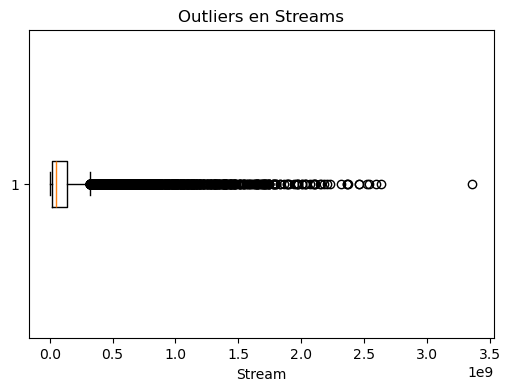

In [72]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Stream"].dropna(), vert=False)
plt.title("Outliers en Streams")
plt.xlabel("Stream")
plt.show()

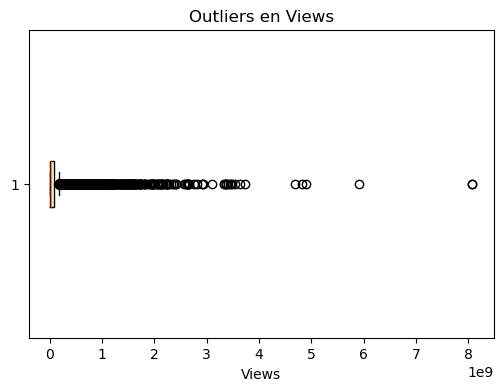

In [73]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Views"].dropna(), vert=False)
plt.title("Outliers en Views")
plt.xlabel("Views")
plt.show()

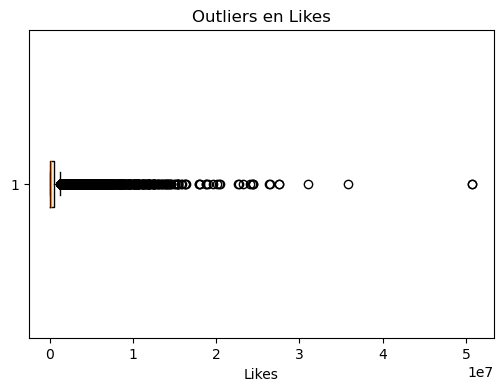

In [74]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Likes"].dropna(), vert=False)
plt.title("Outliers en Likes")
plt.xlabel("Likes")
plt.show()

Mirando los outliers concluimos que los boxplots muestran muchos valores muy altos en Streams, Views y Likes, pero estos no
son errores, sino canciones extremadamente populares. Estas variables tienen
distribuciones de cola larga, por lo que la presencia de valores altos es totalmente
esperable. 

En el caso de Streams, revisamos manualmente tanto el valor
máximo como el mínimo y confirmamos que ambos eran válidos: el máximo correspondía a
una canción muy exitosa y el mínimo no era negativo. Solo se consideran outliers
inválidos los menores que 0, y en nuestra revisión en likes y views no apareció ninguno. Por tanto, no
es necesario eliminar ningún dato por outliers.


## Correlación
Para estudiar cómo se relacionan las variables numéricas entre sí, calculamos la matriz de correlación y lo representamos mediante un mapa de calor.

In [75]:
spotify_youtube_df.corr(numeric_only=True)

,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video
Stream,1.000000,0.068758,0.045223,-0.007966,0.118725,-0.014601,-0.098818,-0.034199,-0.009941,0.009047,-0.011323,0.599956,0.651149,0.260192,0.100989,0.100226
Danceability,0.068758,1.000000,0.237650,0.034668,0.361970,0.221033,-0.288071,-0.087055,0.464799,-0.057998,-0.095837,0.084766,0.095620,0.041116,0.015356,0.048407
Energy,0.045223,0.237650,1.000000,0.032815,0.741277,0.086587,-0.660854,0.168243,0.390913,0.151668,0.018549,0.067172,0.063849,0.043486,0.087347,0.113998
Key,-0.007966,0.034668,0.032815,1.000000,0.028808,0.026067,-0.033016,-0.013178,0.041111,0.001540,-0.001957,0.004644,0.003248,0.004682,-0.005600,0.007395
Loudness,0.118725,0.361970,0.741277,0.028808,1.000000,0.065752,-0.552855,0.080372,0.317208,0.135466,0.006399,0.119669,0.123932,0.056944,0.102019,0.144739
Speechiness,-0.014601,0.221033,0.086587,0.026067,0.065752,1.000000,-0.097957,0.059961,0.059095,0.058229,-0.050916,-0.010325,0.014573,0.012010,-0.063665,-0.055519
Acousticness,-0.098818,-0.288071,-0.660854,-0.033016,-0.552855,-0.097957,1.000000,-0.046845,-0.205522,-0.123259,-0.018048,-0.065180,-0.073430,-0.050207,-0.078774,-0.095258
Liveness,-0.034199,-0.087055,0.168243,-0.013178,0.080372,0.059961,-0.046845,1.000000,0.027933,0.012007,-0.001862,-0.014221,-0.020415,-0.012899,0.000107,0.003756
Valence,-0.009941,0.464799,0.390913,0.041111,0.317208,0.059095,-0.205522,0.027933,1.000000,0.092451,-0.056712,0.041257,0.016872,0.020058,0.021184,0.010360
Tempo,0.009047,-0.057998,0.151668,0.001540,0.135466,0.058229,-0.123259,0.012007,0.092451,1.000000,-0.013518,0.010134,0.011821,0.011437,0.012014,0.020447


<Axes: >

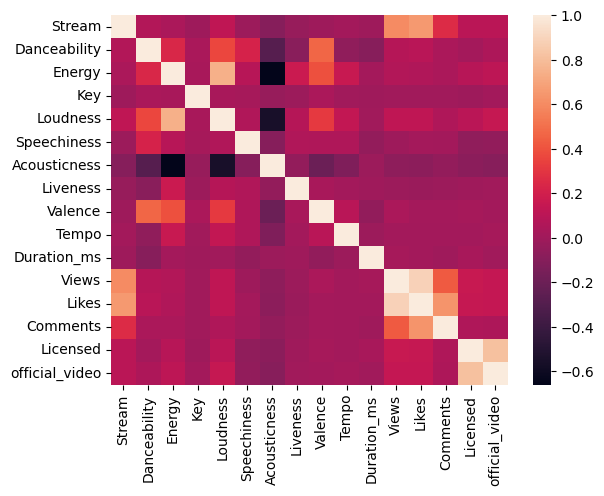

In [76]:
corr = spotify_youtube_df.corr(numeric_only=True)
sns.heatmap(corr)

La matriz de correlación y el mapa de calor muestra patrones claros entre las variables numericas:

- Métricas de YouTube (Views, Likes y Comments) están fuertemente correlacionadas entre sí, especialmente Views–Likes (0.89)  
- Streams en Spotify presenta correlación moderada Views (0.60) y con Likes (0.65), lo que indica que la popularidad suele ser similar en ambas plataformas.  
- Entre las características de audio destacan: 

    -Energy–Loudness (0.74), relación lógica entre intensidad y volumen.

    -Energy–Acousticness (–0.66), canciones acústicas tienden a ser menos energéticas.

    -Danceability–Valence (0.46), canciones más bailables suelen sonar más positivas.

- Variables como Tempo, Duration_ms, Liveness o Speechiness muestran poca relación con Streams, Views y Likes
- Licensed y official_video tienen alta correlación entre sí (0.81), como es esperable.

Durante el proceso de limpieza, eliminamos las variables 'views', 'likes' y 'comments', estas columnas representan medidas de interacción y popularidad obtenidas posteriormente a la publicaicon del contenido, es por esto que no resultan adecuadas para el objetivo de nuestro proyecto. 

El propósito del análisis es predecir eel número de reproducciones en Sportify(stram) utilizando únicamente información disponible antes del lanzamiento, fundamentalmente características musicales y metadatos intrínsecos de la canción.

En caso de usar estas metricas podriamos tener problemas de fuga de información (Data Leakage), estas variables no están disponibles antes de su publicación y reflejan su rendimiento real o falta de relación causal con las características musicales, no aportan información sobre los atributos sonoros que buscamos analizar, y mezclan éxito comercial con interacción social.

Por estas razones, estas variables se han eliminado para asegurar un modelo más robusto, coherente y predictivamente válido, preservando únicamente información relevante para analizar la música y su potencial de éxito.

In [77]:
spotify_youtube_df = spotify_youtube_df.drop(["Views", "Likes", "Comments"], axis=1)


In [78]:
spotify_youtube_df.head()

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Key_name,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Licensed,official_video
17164,KAYTRANADA,LITE SPOTS,99.9%,album,29240851.0,0.884,0.549,1,C# / Db,-11.683,0.4710,0.03460,0.112,0.394,120.461,Moderato / Allegretto,230920.0,True,True
14868,Rita Ora,Follow Me,Follow Me,single,82813284.0,0.673,0.729,6,F# / Gb,-4.879,0.0496,0.08300,0.100,0.675,122.023,Allegro,169672.0,True,True
13084,Big Sean,Bounce Back,I Decided.,album,666145000.0,0.780,0.575,1,C# / Db,-5.628,0.1390,0.10600,0.129,0.273,81.502,Andante,222360.0,True,True
6558,Dave Matthews Band,#41,Crash,album,34528391.0,0.577,0.726,4,E,-8.011,0.0299,0.00199,0.158,0.764,107.416,Andante,399800.0,True,True
16283,Ray Dalton,Call It Love - Klingande Remix,Call It Love (Klingande Remix),single,1153344.0,0.671,0.687,10,A# / Bb,-8.669,0.0502,0.01110,0.504,0.623,121.992,Allegro,149508.0,True,True


In [79]:
spotify_youtube_df.shape

(15621, 19)

## Conclusiones del dataset

Creemos que es un buen dataset ya que:  
- Tras los cambios no hay missing values  
- Hay mucha correlación entre las variables lo que nos indica que los datos son coherentes entre sí  
- Los datos que están relacionados están escritos en la misma escala como en la columna liveness, valance... que están escritos en (0,1)
- No hemos acotado los valores superiores porque creemos que de esta manera somos más fieles al mundo actual.

Exportamos el dataset de train limpio llamándolo 'spotify_limpio_train' y el dataset de test, al que no hemos aplicado ningún cambio.

In [80]:
spotify_youtube_df.to_csv("spotify_limpio_train.csv", index=False)

In [81]:
test_df.to_csv("spotify_test.csv", index=False)